<a href="https://colab.research.google.com/github/JOAOPEDRO2018/Jp_DataScience/blob/master/Analisando_os_Dados_do_Airbnb_Turquia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**


---

# Análise dos Dados do Airbnb - *Istanbul - Turkey*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Istanbul, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados foram obtidos a partir do site oficial do Airbnb disponibilizados em [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

Nesta análise usaremos somente os dados do arquivo:

> `listings.csv `- Summary information and metrics for listings in Istanbul (good for visualisations).



In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/turkey/marmara/istanbul/2020-12-31/visualisations/listings.csv')

## Análise dos Dados
Esta etapa iremos analisar os dados de maneira aprofundada a fim de procurar através deles informações abstrusas que possam ser relevantes para o mundo real.

**Dicionário das variáveis**

* `id` - número identificador gerado pelo airbnb
* `name` - Titulo do anúncio
* `host_id` - número identificador do proprietário
*	`host_name`	- Nome do proprietário
* `neighbourhood_group` - Esta coluna não contém nenhum valor válido
*	`neighbourhood` - Bairro
*	`latitude` - Coordenada latitude
*	`longitude` - Coordenada longitude
*	`room_type` - Tipo de quarto
*	`price` - preço
*	`minimum_nights` - mínimo de noites para alugar
*	`number_of_reviews` - número de recomendações
*	`last_review` - Data da última recomendação
*	`reviews_per_month` - quantidade de reviews por mês
*	`calculated_host_listings_count` - Quantidades de imóveis do anfitrião
*	`availability_365` - número de dias de disponibilidade dentro de 365 dias





Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,891,365,41,2018-11-07,0.31,2,363
1,27271,Lovely apartment in perfect location,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,273,30,10,2018-05-04,0.30,1,0
2,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09048,29.05559,Entire home/apt,930,3,0,NaN,NaN,1,88
3,29241,"↪ Istanbul, Your second house",125742,Şevki,NaN,Beyoglu,41.04844,28.95254,Private room,372,3,0,NaN,NaN,1,0
4,30697,nice home in popular area,132137,Nan,NaN,Beyoglu,41.03350,28.97626,Private room,908,1,1,2010-06-14,0.01,1,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos verificar com quantos dados estamos lidando além de analisar os tipos de dados que as colunas possuem.

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:", df.shape[0])
print("Colunas: {}\n" .format(df.shape[1]))

# verificar os tipos das colunas do dataset
display(df.dtypes)

Entradas: 23650
Colunas: 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Através da porcentagem conseguimos ter uma ideia de da quantidade de valores faltantes em cada coluna.

Dessa forma podemos tomar a melhor decisão de como trabalhar e que medida tomar quanto aos *valores missing*.

A exemplo da coluna `neighbourhood_group` que possue todos seus valores NaN então uma boa medida seria simplesmente exclui-la, assim ela não interfere nas próximas analises.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)


neighbourhood_group               100.000000
reviews_per_month                  52.063425
last_review                        52.063425
name                                0.143763
host_name                           0.033827
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

In [ ]:
df = df.drop(columns="neighbourhood_group")

### **Q3. Qual o tipo de distribuição das variáveis?** 

Com o histograma conseguimos analisar alguns dados que se mostram muito estranhos para a realidade e com isso limpar mais ainda o dataframe.

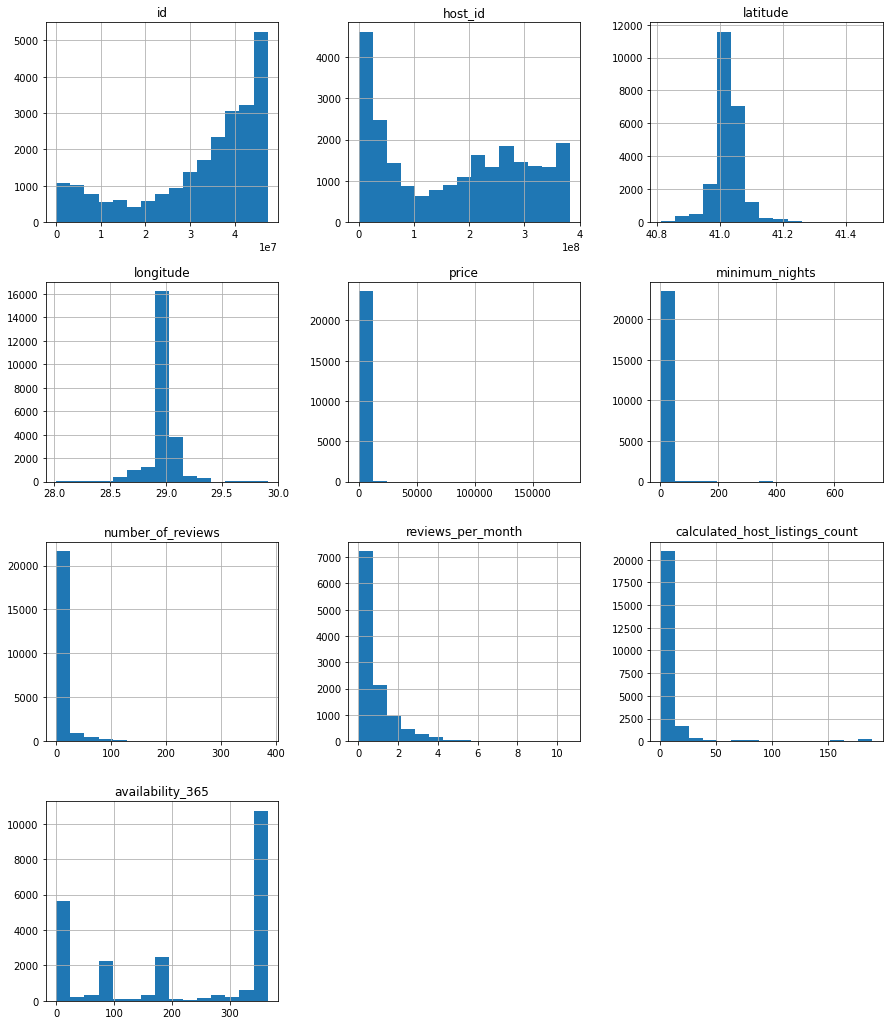

In [ ]:
# plotar o histograma das variáveis numérica
df.hist(bins=15, figsize=(15,18));

**Outliers**

Usando o describe podemos ver claramente a presença de *outliers* distorcendo assim a representação do gráfico.

In [ ]:
df[["price","minimum_nights","number_of_reviews",
    "reviews_per_month",'availability_365','calculated_host_listings_count']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count
count,23650.000000,23650.000000,23650.000000,11337.000000,23650.000000,23650.000000
mean,548.576152,4.585920,7.995476,0.772304,214.721734,8.004144
std,3364.154723,20.709658,24.111482,0.946996,154.401967,22.497126
min,0.000000,1.000000,0.000000,0.010000,0.000000,1.000000
25%,150.000000,1.000000,0.000000,0.120000,54.000000,1.000000
50%,260.000000,1.000000,0.000000,0.420000,270.000000,2.000000
75%,472.000000,3.000000,4.000000,1.010000,365.000000,7.000000
max,181891.000000,730.000000,385.000000,10.650000,365.000000,189.000000


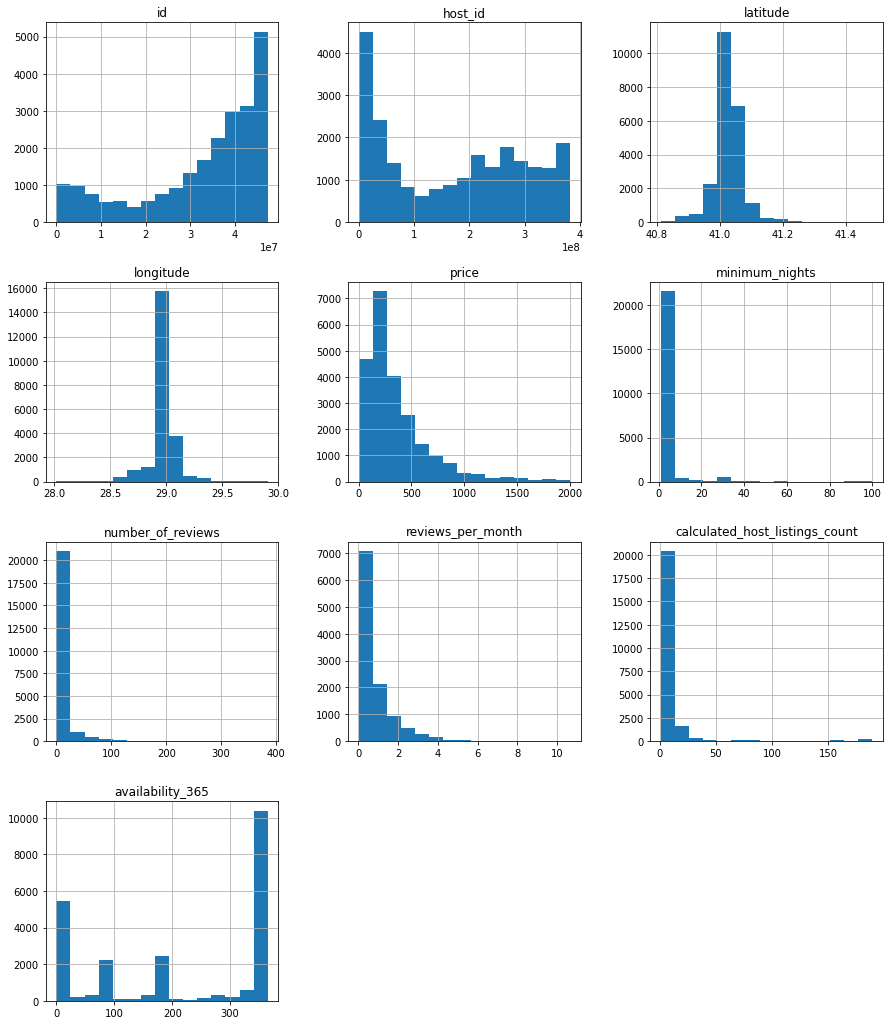

In [ ]:
#copiando o dataframe para uma nova variável
df_clean = df.copy()
#excluindo os outliers
df_clean.drop(df_clean[df_clean.price > 2000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 100 ].index, axis=0, inplace=True)
#plotando o novo histograma
df_clean.hist(bins=15, figsize=(15,18));

In [ ]:
df_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.298300e+04,2.298300e+04,22983.000000,22983.000000,22983.000000,22983.000000,22983.000000,11130.000000,22983.000000,22983.000000
mean,3.264247e+07,1.708851e+08,41.028093,28.982661,357.026498,3.410695,8.126876,0.777991,7.955184,214.297089
std,1.374917e+07,1.271993e+08,0.045675,0.126338,313.252029,8.001937,24.368393,0.951135,22.406638,154.233508
min,2.727100e+04,1.969200e+04,40.813370,28.018990,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,2.607675e+07,3.945590e+07,41.004990,28.972855,150.000000,1.000000,0.000000,0.120000,1.000000,55.000000
50%,3.753598e+07,1.815199e+08,41.031530,28.982750,254.000000,1.000000,0.000000,0.420000,2.000000,268.000000
75%,4.371056e+07,2.833149e+08,41.047865,29.012475,453.000000,3.000000,4.000000,1.020000,7.000000,364.000000
max,4.736096e+07,3.822753e+08,41.483730,29.908280,2000.000000,100.000000,385.000000,10.650000,189.000000,365.000000


### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
#media dos preços originais
df["price"].describe()

count     23650.000000
mean        548.576152
std        3364.154723
min           0.000000
25%         150.000000
50%         260.000000
75%         472.000000
max      181891.000000
Name: price, dtype: float64

In [ ]:
#média os preços após retirar os outlies
df_clean['price'].describe()

count    22983.000000
mean       357.026498
std        313.252029
min          0.000000
25%        150.000000
50%        254.000000
75%        453.000000
max       2000.000000
Name: price, dtype: float64

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[["price","minimum_nights","number_of_reviews",
    "reviews_per_month",'availability_365','calculated_host_listings_count']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count
price,1.000000,0.047821,-0.004088,-0.023253,0.079984,0.195876
minimum_nights,0.047821,1.000000,-0.023918,-0.072759,-0.016277,0.184471
number_of_reviews,-0.004088,-0.023918,1.000000,0.570556,0.053291,0.010233
reviews_per_month,-0.023253,-0.072759,0.570556,1.000000,0.036469,0.137221
availability_365,0.079984,-0.016277,0.053291,0.036469,1.000000,0.069680
calculated_host_listings_count,0.195876,0.184471,0.010233,0.137221,0.069680,1.000000


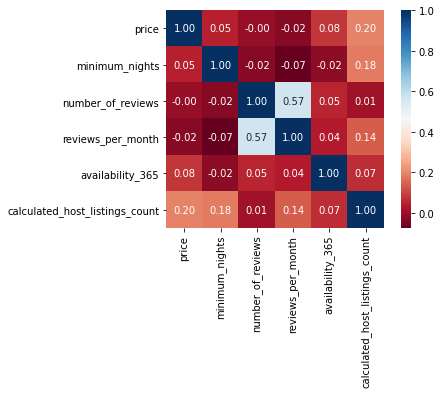

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor="white", annot=True)

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Os tipo de imóveis mais alugados são os do tipo home, o que é bem condizente com a proposta do Airbnb, que é permitir aos indivíduos alugar o todo ou parte de sua própria casa, como uma forma de acomodação extra.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    11996
Private room       10181
Hotel room           821
Shared room          652
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df.room_type.value_counts()/df.shape[0])*100

Entire home/apt    50.723044
Private room       43.048626
Hotel room          3.471459
Shared room         2.756871
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**
Como a filtragem é feita a partir do preço das diarias dos hotéis, e temos hotéis mais caros e outros mais baratos na mesma localização, não podemos tirar uma conclução tão acertiva quanto ao metro quadrado mais caro da cidade, para isso seria necessário um dataset como dados mais especificos quanto a localidade.


In [ ]:
# ver preços por bairros, na média
df.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Silivri         1632.000000
Beykoz          1507.941667
Sariyer         1292.292994
Catalca         1269.850000
Kucukcekmece    1248.358974
Buyukcekmece    1128.605769
Beylikduzu       872.862069
Fatih            812.930009
Sile             739.784530
Adalar           729.681081
Name: price, dtype: float64

In [ ]:
#vendo a quantidade de entradas
print(df[df.neighbourhood=="Silivri"].shape)

(45, 15)


In [ ]:
#filtro aplicado nos dados para o bairro de Silivri
df[df.neighbourhood =='Silivri']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
210,614112,small house in outside of istanbul,3046062,Ali,Silivri,41.14007,28.31601,Private room,1142,1,0,NaN,NaN,1,0
374,871792,Super Luxury Farmhouse in Silivri,4373001,Serkan,Silivri,41.21394,28.08979,Entire home/apt,2286,1,1,2015-08-03,0.02,1,1
3287,11957205,ilkent sitesi semizkumlar silivri,59004770,Ahmet Alev,Silivri,41.07518,28.17048,Entire home/apt,400,7,0,NaN,NaN,1,365
4470,19294108,Tepe Emlak,135109381,Turgay,Silivri,41.25958,28.03261,Private room,35,1,0,NaN,NaN,1,0
4549,19742560,Luxury 6 Bedroom Vacation Home on Large Estate,107064590,Cenk,Silivri,41.09088,28.19255,Entire home/apt,4065,3,0,NaN,NaN,1,88
4560,19795295,Köy evi,139800934,Salih,Silivri,41.15657,28.16847,Private room,186,1,0,NaN,NaN,1,365
4798,21119206,"Villa with Private Pool and Garden, with Barbecue",152318127,Emir,Silivri,41.09660,28.34238,Entire home/apt,750,3,10,2020-12-21,0.30,1,116
5413,23913461,Silivri'de Bahçeli Plajlı Mangallı Villada Odalar,41947270,Eda,Silivri,41.06064,28.09114,Private room,113,1,0,NaN,NaN,1,89
6448,27819128,Silivri’de Bahçeli Villada oda Denize 5 dk,176354955,Münevver,Silivri,41.13396,28.07899,Private room,106,1,0,NaN,NaN,1,89
6587,28127324,Havuzlu 2 katlı villa,69407366,Emre,Silivri,41.08987,28.35319,Entire home/apt,10000,1,0,NaN,NaN,1,89


Um **baixo** desvio padrão indica que os pontos dos dados tendem a estar **próximos da média** ou do valor esperado. Um **alto** desvio padrão indica que os pontos dos **dados estão espalhados** por uma ampla gama de valores. O std da tabela price está tão alto  **2851.294937** que esses dados são não-representativos para esta análise. Além de que uma rápida

In [ ]:
df[df.neighbourhood =='Silivri'].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.500000e+01,4.500000e+01,45.000000,45.000000,45.000000,45.000000,45.000000,16.000000,45.000000,45.000000
mean,3.423031e+07,1.838917e+08,41.089922,28.223921,1632.000000,2.533333,1.644444,0.641250,1.577778,187.000000
std,1.115137e+07,1.125305e+08,0.047055,0.116992,2851.294937,3.230536,3.061161,1.064474,2.158376,137.835706
min,6.141120e+05,3.046062e+06,41.041680,28.018990,35.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,2.841852e+07,8.866972e+07,41.063770,28.128420,200.000000,1.000000,0.000000,0.122500,1.000000,88.000000
50%,3.774936e+07,1.891557e+08,41.073080,28.247630,557.000000,1.000000,0.000000,0.340000,1.000000,178.000000
75%,4.211075e+07,2.871538e+08,41.090880,28.320430,1750.000000,3.000000,2.000000,0.695000,1.000000,363.000000
max,4.708552e+07,3.805331e+08,41.259580,28.385140,15000.000000,20.000000,11.000000,4.350000,15.000000,365.000000


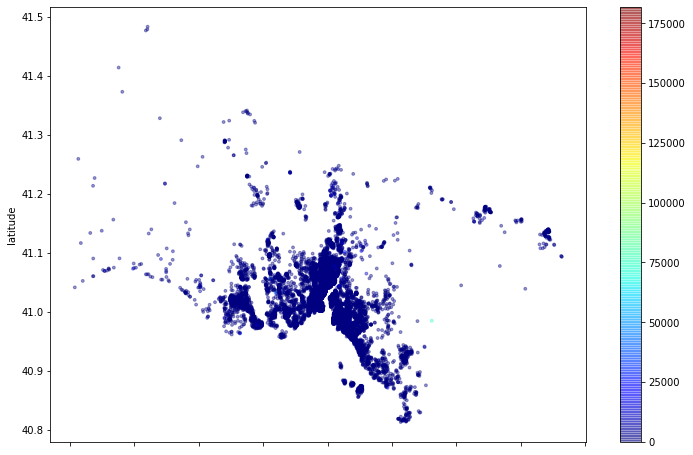

In [ ]:
# plotar os imóveis pela latitude-longitude

df.plot(kind='scatter',x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
        cmap=plt.get_cmap('jet'),figsize=(12,8))

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``

df_clean['minimum_nights'].mean()

3.41069486141931

## Conclusões

A analise feita aqui não deve ser levada para a realidade, é somente para estudos e treinamento de analises. 
Apesar disto foi possivel o bservar que o dataset havia uma boa quantidade de dados *missing*  e de *outliers* que deixavam os dados fora da realidade, como também os tipo de imóveis mais alugados no Airbnb. Conforme qual seja sua análise é de suma importâcia saber quais dados seriam relevantes analisar.  